In [6]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the Seaborn 'tips' dataset
data = sns.load_dataset('tips')

# Check for missing data
print(data.isnull().sum())
# Feature scaling - Standardizing numerical features (excluding 'sex' and 'day')
numerical_columns = ['total_bill', 'tip', 'size']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


print(data.head())


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
   total_bill       tip     sex smoker  day    time      size
0   -0.314711 -1.439947  Female     No  Sun  Dinner -0.600193
1   -1.063235 -0.969205    Male     No  Sun  Dinner  0.453383
2    0.137780  0.363356    Male     No  Sun  Dinner  0.453383
3    0.438315  0.225754    Male     No  Sun  Dinner -0.600193
4    0.540745  0.443020  Female     No  Sun  Dinner  1.506958


In [7]:
import numpy as np
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
z_scores = np.abs(zscore(data[numerical_columns]))

# Set a threshold (e.g., Z-score > 3) to detect outliers
threshold = 3
outliers = (z_scores > threshold)

# Remove rows with outliers (any column that has an outlier)
data_cleaned = data[~np.any(outliers, axis=1)]

print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape: {data_cleaned.shape}")


Original data shape: (244, 7)
Cleaned data shape: (236, 7)


In [9]:
class DataProcessor:
    def __init__(self, data):
        """Initialize with the data to process."""
        self.data = data
        self.scaler = StandardScaler()  # Used for feature scaling
    
    def get_cleaned_data(self):
        """Return the cleaned data (after handling missing values, scaling, and removing outliers)."""
        return self.data
# Create an instance of the DataProcessor class
processor = DataProcessor(data)

# Get the cleaned data after preprocessing
cleaned_data = processor.get_cleaned_data()

# Display the cleaned data
print(cleaned_data.head())


   total_bill       tip     sex smoker  day    time      size
0   -0.314711 -1.439947  Female     No  Sun  Dinner -0.600193
1   -1.063235 -0.969205    Male     No  Sun  Dinner  0.453383
2    0.137780  0.363356    Male     No  Sun  Dinner  0.453383
3    0.438315  0.225754    Male     No  Sun  Dinner -0.600193
4    0.540745  0.443020  Female     No  Sun  Dinner  1.506958


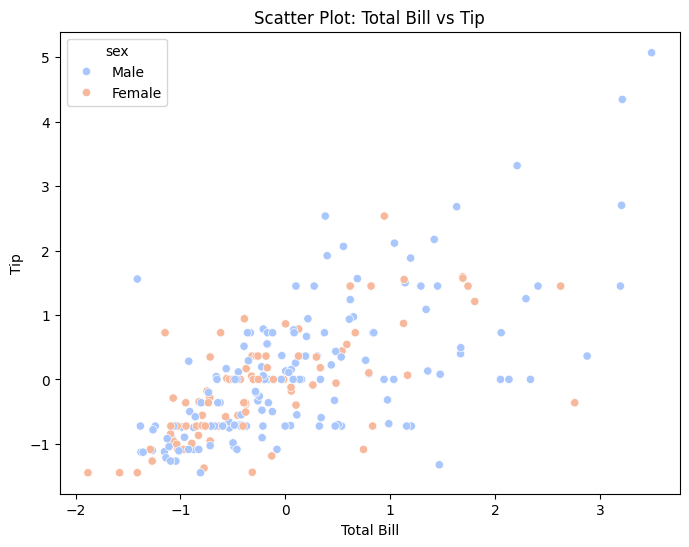

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to visualize the relationship between 'total_bill' and 'tip'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cleaned_data, x='total_bill', y='tip', hue='sex', palette='coolwarm')
plt.title('Scatter Plot: Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

/tmp/ipykernel_35624/2463450192.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_data, x='day', y='total_bill', palette='Set2')


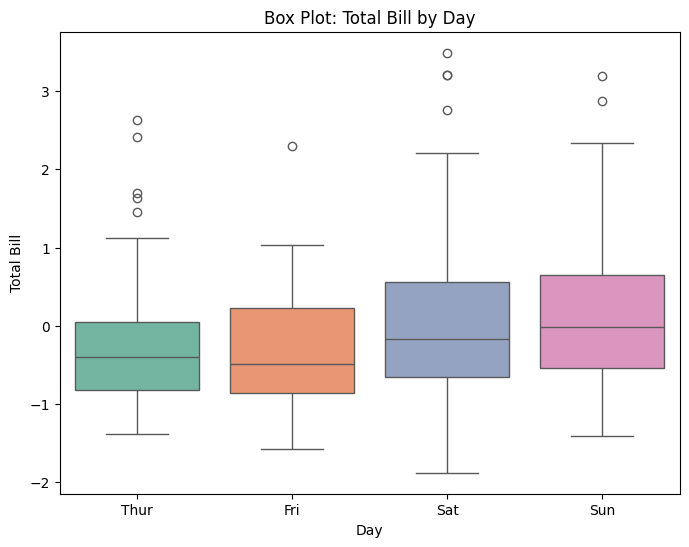

In [11]:
# Box plot to visualize 'total_bill' by 'day'
plt.figure(figsize=(8, 6))
sns.boxplot(data=cleaned_data, x='day', y='total_bill', palette='Set2')
plt.title('Box Plot: Total Bill by Day')
plt.xlabel('Day')
plt.ylabel('Total Bill')
plt.show()